# Example 9

### Packages and aesthetic purposed variables

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
import plotly.graph_objects as go

In [2]:
#colors
c1 = '#84bef5'
c2 = '#090659'

#Size of plot
def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

## Coarse Triangulation of the Oval Plate

### Defining vertices and edges of the triangulation

The 13th (and last) vertex has index 0 to make calculations easier using modulo 13

In [3]:
vertices = [(1,1),(-1,0),(0,0),(1,0),(0,1),(-1,1),(-math.sqrt(3)/2-1,1/2),(-math.sqrt(3)/2-1,-1/2),
(-1,-1),(0,-1),(1,-1),(math.sqrt(3)/2+1,-1/2),(math.sqrt(3)/2+1,1/2)]
# We use numpy to make the process more efficient
x = [np.array(v) for v in vertices]

edges = [(1,5),(1,7),(1,8),(1,9),(1,2),(1,4),(1,6),
(2,3),(2,4),(2,9),(3,4),(3,9),(3,10),(3,11),(3,12),(3,13),
(4,5),(4,13),(5,6),(6,7),(7,8),(8,9),(9,10),(10,11),(11,12),(12,13)]

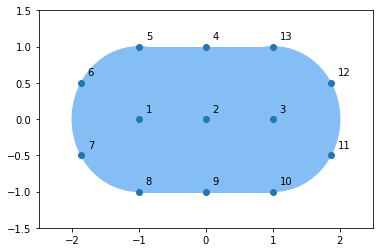

In [4]:
circle1 = plt.Circle(x[1], 1, color=c1)
circle2 = plt.Circle(x[3], 1, color=c1)
rect = plt.Rectangle(x[8],2,2, color = c1)

fig,ax = plt.subplots()
ax.add_patch(circle1)
ax.add_patch(circle2)
ax.add_patch(rect)
ax.scatter(*zip(*x))
for i in range(1,len(x)+1):
    m = 0.1
    x1,y1 = x[i%13]
    ax.text(x1+m, y1+m, i, fontsize = 10)
ax.set_xlim([-2.5,2.5])
ax.set_ylim([-1.5,1.5])
plt.show()

### Triangle algorithm

The method get_triangles returns the vertices in all 3 cycles in an undirected graph

In [5]:
def get_triangles(edges):
    triangles = []
    n = len(edges)
    for i in range(n):
        e1 = edges[i]
        for j in range(i+1,n):
            e2 = edges[j]
            vertices = set(e1+e2)
            if len(vertices) == 3:
                for k in range(j+1,n):
                    e3 = edges[k]
                    if (e3[0] in vertices) and (e3[1] in vertices):
                        triangles.append(set(e1+e2))
    return(triangles)
triangles = get_triangles(edges)
triangles

[{1, 4, 5},
 {1, 5, 6},
 {1, 7, 8},
 {1, 6, 7},
 {1, 8, 9},
 {1, 2, 9},
 {1, 2, 4},
 {2, 3, 4},
 {2, 3, 9},
 {3, 4, 13},
 {3, 9, 10},
 {3, 10, 11},
 {3, 11, 12},
 {3, 12, 13}]

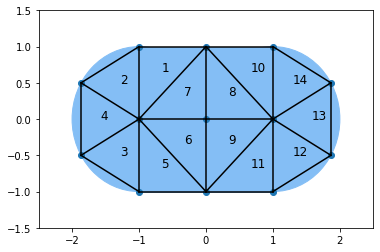

In [6]:
circle1 = plt.Circle(x[1], 1, color=c1)
circle2 = plt.Circle(x[3], 1, color=c1)
rect = plt.Rectangle(x[8],2,2, color =c1)
fig,ax = plt.subplots()
ax.add_patch(circle1)
ax.add_patch(circle2)
ax.add_patch(rect)
ax.scatter(*zip(*x))
ax.set_xlim([-2.5,2.5])
ax.set_ylim([-1.5,1.5])
for e in edges:
    points = [x[e[0]%13], x[e[1]%13]]
    x1,y1 = tuple(zip(*points))
    ax.plot(x1,y1, color = "black")
for i in range(len(triangles)):
    t = triangles[i]
    vertices = [x[j%13] for j in t]
    x1,y1 = tuple(zip(*vertices))
    x2,y2 = (sum(x1)/3, sum(y1)/3)
    ax.text(x2, y2, i+1, fontsize = 12)

### Calculating Matrix $K^*$
For each triangle $v$ there is a corresponding Matrix $K_v$ which entries are the following function:

<img src="Images/Screenshot from 2022-10-13 21-06-22.png">

And $\Delta_v$ is twice the area of the triangle. Then, the Matrix $K^*$ is the sum of all $K_v$'s

In [7]:
areaTriangle = lambda a,b,c: 1/2*(
    a[0]*(b[1]-c[1])+
    b[0]*(c[1]-a[1])+
    c[0]*(a[1]-b[1]))

K = np.zeros((13,13))
# K* is the sum of all K_i matrices
for a in range(len(triangles)):
    t = list(triangles[a])
    deltav = 2*abs(areaTriangle(x[t[0]%13],x[t[1]%13],x[t[2]%13]))
    for i in t:
        for j in t:
            vertices = [v for v in t if v not in [i,j]]
            if i!=j:
                k = vertices[0]
                K[i%13,j%13] += -np.sum((x[i%13]-x[k%13])*(x[j%13]-x[k%13]))/(2*deltav)
            if i == j:
                k1 = vertices[0]
                k2 = vertices[1]
                K[i%13,j%13] += np.sum((x[k1%13]-x[k2%13])*(x[k1%13]-x[k2%13]))/(2*deltav)

# This 2 aditional lines of codes are for visualization:
df = pd.DataFrame(K[:,list(range(1,13))+[0]][list(range(1,13))+[0],:], columns = list(range(1,14)))
df.index += 1
print("The matrix K*:")
df

The matrix K*:


,1,2,3,4,5,6,7,8,9,10,11,12,13
1,3.732051,-1.0,0.000000,0.0,-0.788675,-0.577350,-0.577350,-0.788675,0.0,0.000000,0.000000,0.000000,0.000000
2,-1.000000,4.0,-1.000000,-1.0,0.000000,0.000000,0.000000,0.000000,-1.0,0.000000,0.000000,0.000000,0.000000
3,0.000000,-1.0,3.732051,0.0,0.000000,0.000000,0.000000,0.000000,0.0,-0.788675,-0.577350,-0.577350,-0.788675
4,0.000000,-1.0,0.000000,2.0,-0.500000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,-0.500000
5,-0.788675,0.0,0.000000,-0.5,1.577350,-0.288675,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
6,-0.577350,0.0,0.000000,0.0,-0.288675,1.154701,-0.288675,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
7,-0.577350,0.0,0.000000,0.0,0.000000,-0.288675,1.154701,-0.288675,0.0,0.000000,0.000000,0.000000,0.000000
8,-0.788675,0.0,0.000000,0.0,0.000000,0.000000,-0.288675,1.577350,-0.5,0.000000,0.000000,0.000000,0.000000
9,0.000000,-1.0,0.000000,0.0,0.000000,0.000000,0.000000,-0.500000,2.0,-0.500000,0.000000,0.000000,0.000000
10,0.000000,0.0,-0.788675,0.0,0.000000,0.000000,0.000000,0.000000,-0.5,1.577350,-0.288675,0.000000,0.000000


<img src="Images/Screenshot from 2022-10-13 21-30-40.png">

### Calculatig $K$

Now, to calculate $K$ we take the columns and rows from $K^*$ that correspond to internal nodes $\{1,2,3\}$

In [8]:
K1 = K[1:4,1:4]
df = pd.DataFrame(K1, columns= list(range(1,4)))
df.index += 1
print("The matrix K:")
df

The matrix K:


,1,2,3
1,3.732051,-1.0,0.000000
2,-1.000000,4.0,-1.000000
3,0.000000,-1.0,3.732051


<img src = "Images/Screenshot from 2022-10-13 21-37-02.png">

### Calculating $\widetilde K$
We take the rows of the internal nodes and the columns of the external nodes from the matrix $K^*$ to calculate $\widetilde K$

In [9]:
K2 = np.delete(K[1:4,:],[1,2,3], 1)
df = pd.DataFrame(K2[:,list(range(1,10))+[0]], columns = list(range(4,14)))
df.index += 1
print("The Matrix ~K")
df

The Matrix ~K


,4,5,6,7,8,9,10,11,12,13
1,0.0,-0.788675,-0.57735,-0.57735,-0.788675,0.0,0.000000,0.00000,0.00000,0.000000
2,-1.0,0.000000,0.00000,0.00000,0.000000,-1.0,0.000000,0.00000,0.00000,0.000000
3,0.0,0.000000,0.00000,0.00000,0.000000,0.0,-0.788675,-0.57735,-0.57735,-0.788675


<img src = "Images/Screenshot from 2022-10-13 21-53-09.png">

### Defining $h$

We found an error in the paper with the dimensions of the array $h$. Thus, we took some liberties by removing the last entry of the array:
<img src = "Images/Screenshot from 2022-10-13 22-04-12.png">

In [10]:
h = np.array([1,0]+[-1]*4+[0]+[1]*3)
pd.DataFrame((np.matrix(h))[:,list(range(1,10))+[0]], columns = list(range(4,14)))

,4,5,6,7,8,9,10,11,12,13
0,0,-1,-1,-1,-1,0,1,1,1,1


### Calculating $c$

We use the formula:
$$ c = K^{-1} \left(-\widetilde K h\right) $$
Since we change $h$ we didn't obtain the same results as the paper. But the steps done before were correct.

In [11]:
c = np.linalg.inv(K1)@(-K2@h)
pd.DataFrame(c).T

,0,1,2
0,-0.732051,0.0,0.732051


### 3D visualization of the results (a purple Pringle)

The external nodes increase linearly from 0 to 1 while the internal nodes $\{1,2,3\}$ have heights $\{-0.732051,0.0,0.732051\}$ respectively.

In [12]:
fig = go.Figure(data=[
    go.Mesh3d(
        x=[x[i][0] for i in range(13)],
        y=[x[i][1] for i in range(13)],
        z=[h[0]]+list(c)+list(h[1:]),
        colorbar_title='z',
        colorscale=[[0, '#FFEBCD'],
                    [0.5, '#6b5ea6'],
                    [1, '#2a109e']],
        # Intensity of each vertex, which will be interpolated and color-coded
        intensity = np.linspace(0, 1, 14, endpoint=True),
        intensitymode='cell',
        # i, j and k give the vertices of triangles
        # here we represent the 4 triangles of the tetrahedron surface
        i=[a%13 for a in list(zip(*triangles))[0]],
        j=[a%13 for a in list(zip(*triangles))[1]],
        k=[a%13 for a in list(zip(*triangles))[2]],
        name='y',
        color=c1,
        showscale=True
    )
])
fig.show()

# Square Mesh for the Oval Plate

We will use a $2m\times m$ matrix to define the grid for our approximation. By choosing $m=10$ we obtain the same exact results as the paper. However, for more precition the algorithm can run up to the number $m=100$ in less than 10 minutes.

### Defining internal nodes (interior of the oval plate)

Internal nodes (Represented by 1 in the matrix) satisfy 1 of 3 conditions
$v = (x,y)$ is an internal node if:
$$ \|v-(-1,0)\| < 1 $$
or
$$ [x \in (-1,1)] \land [y \in (-1,1)] $$
or
$$ \|v-(1,0)\| < 1 $$

In [13]:
m = 10
epsilon = 1/m
grid = np.zeros((m+1,2*m+1))
ids = np.fromfunction(lambda i,j: i*(2*m+1) + j , grid.shape, dtype = int)
idToTuple = lambda i : (int(i/(2*m+1)),i%(2*m+1))
xs = np.fromfunction(lambda i,j: j/m*2-2 , grid.shape, dtype = float).round(int(10))
ys = np.fromfunction(lambda i,j: i/m*2-1 , grid.shape, dtype = float).round(int(10))
for i in range(m+1):
    for j in range(2*m+1):
        p = np.array((xs[i,j],ys[i,j]))
        if np.sum((p - x[1])**2) < 1 or np.sum((p - x[3])**2) < 1 or (abs(p[0])<1 and abs(p[1])<1):
            grid[i,j] += 1

### Defining external nodes (boundary of the oval plate)

External nodes (represented by 1/2 in the matrix) are the nodes adjacent to internal nodes that aren't internal nodes already.

In [14]:
for i in range(m+1):
    for j in range(2*m+1):
        if grid[i,j] == 1:
            grid[i+1,j] = 1/2 if grid[i+1,j] == 0 else grid[i+1,j]
            grid[i-1,j] = 1/2 if grid[i-1,j] == 0 else grid[i-1,j]
            grid[i,j+1] = 1/2 if grid[i,j+1] == 0 else grid[i,j+1]
            grid[i,j-1] = 1/2 if grid[i,j-1] == 0 else grid[i,j-1]

The internal nodes are colored dark blue and external nodes green. The nodes excluded are colored yellow.

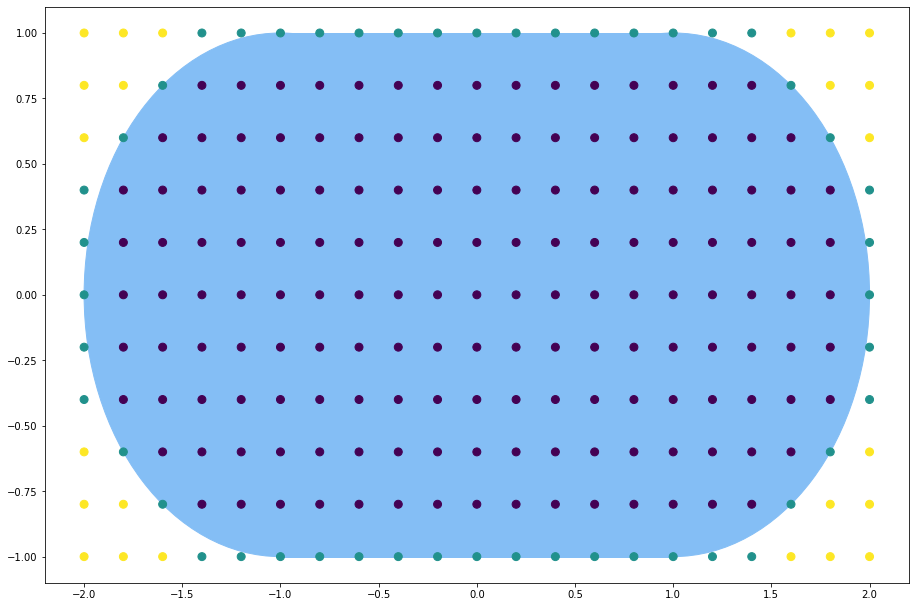

In [15]:
circle1 = plt.Circle(x[1], 1, color=c1)
circle2 = plt.Circle(x[3], 1, color=c1)
rect = plt.Rectangle(x[8],2,2, color = c1)

fig,ax = plt.subplots()

ax.add_patch(circle1)
ax.add_patch(circle2)
ax.add_patch(rect)
ax.scatter(xs,ys,s=2000/(m**(3/2)), c = 1-grid)
set_size(12,8,ax)

### Defining and Drawing all the triangles

In [16]:
edges = ([(ids[i,j],ids[i+1,j]) for i in range(m) for j in range(2*m+1) if (grid[i,j]>0 and grid[i+1,j]>0)]+
    [(ids[i,j],ids[i,j+1]) for i in range(m+1) for j in range(2*m) if (grid[i,j]>0 and grid[i,j+1]>0)]+
    [(ids[i,j],ids[i+1,j+1]) for i in range(m) for j in range(2*m) if (grid[i,j]>0 and grid[i+1,j+1]>0)]+
    [(ids[i,j],ids[i-1,j+1]) for i in range(1,m+1) for j in range(2*m) if (grid[i,j]==1/2 and grid[i-1,j+1]==1/2)]
)
triangles = get_triangles(edges)

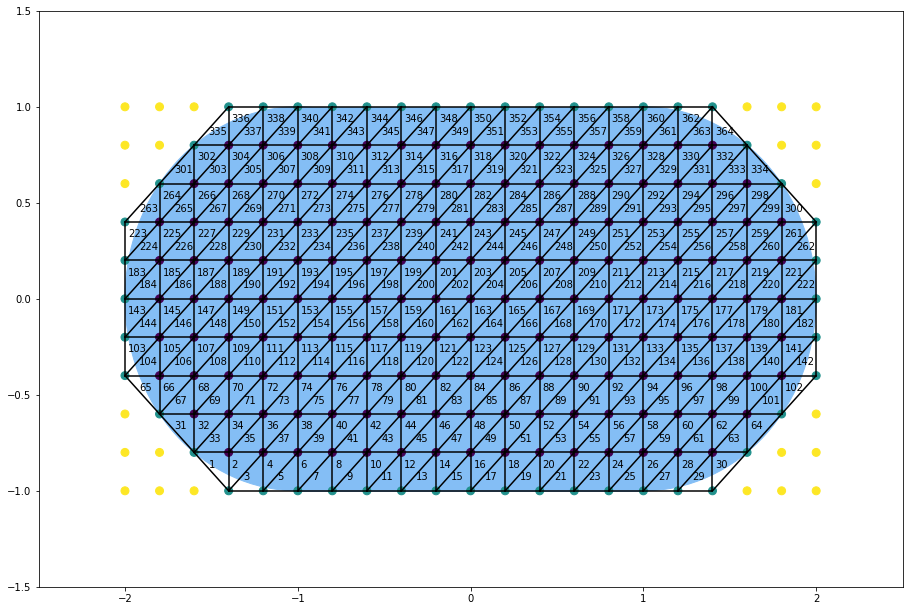

In [17]:
circle1 = plt.Circle(x[1], 1, color=c1)
circle2 = plt.Circle(x[3], 1, color=c1)
rect = plt.Rectangle(x[8],2,2, color = c1)
fig,ax = plt.subplots()
ax.add_patch(circle1)
ax.add_patch(circle2)
ax.add_patch(rect)
ax.scatter(xs,ys,s=2000/(m**(3/2)), c = 1-grid)
ax.set_xlim([-2.5,2.5])
ax.set_ylim([-1.5,1.5])
for e in edges:
    e0 = idToTuple(e[0])
    e1 = idToTuple(e[1])
    x1 = [xs[e0], xs[e1]]
    y1 = [ys[e0], ys[e1]]
    ax.plot(x1,y1, color = "black")

for i in range(len(triangles)):
    t = triangles[i]
    x1 = [xs[idToTuple(j)] for j in t]
    y1 = [ys[idToTuple(j)] for j in t]
    x2,y2 = (sum(x1)/3, sum(y1)/3)
    ax.text(x2-0.05, y2-0.01, i+1, fontsize = 10)
    set_size(12,8,ax)

### Calculating $K^*$

In [18]:
x = np.array([(xs[i,j],ys[i,j]) for i in range(m+1) for j in range(2*m+1)])
g = np.array([grid[i,j] for i in range(m+1) for j in range(2*m+1)])
K = np.zeros(((m+1)*(2*m+1),(m+1)*(2*m+1)))

for a in range(len(triangles)):
    t = list(triangles[a])
    deltav = 2*abs(areaTriangle((x[t[0]]),x[t[1]],x[t[2]]))
    for i in t:
        for j in t:
            vertices = [v for v in t if v not in [i,j]]
            if i!=j:
                k = vertices[0]
                K[i,j] += -np.sum((x[i]-x[k])*(x[j]-x[k]))/(2*deltav)
            if i == j:
                k1 = vertices[0]
                k2 = vertices[1]
                K[i,j] += np.sum((x[k1]-x[k2])*(x[k1]-x[k2]))/(2*deltav)

### Calculating $K$

Taking the rows and columns of internal nodes (represented by 1)

In [19]:
K1 = K[g==1,:][:,g==1]

### Calculating $\widetilde K$

Now the columns of external nodes in the rows of internal nodes.

In [20]:
K2 = K[g==1,:][:,g==1/2]

### Calculating $h$

ONLY FOR EXTERNAL NODES. Let $v = (x,y)$ an external node. Then the entry for $v$ in the array $h$ is
$$ -1 \text{ if: } x\leq -1$$
$$ x \text{ if: } |x| < 1$$
$$ 1 \text{ if: } x\geq 1$$

In [21]:
idsexternal = ids[grid==1/2]
idsinternal = ids[grid==1]
h = [-1 if x[i][0] < -1 else x[i][0] if x[i][0] < 1 else 1 for i in idsexternal]

### Calculating $c$

In [22]:
c = np.linalg.inv(K1)@(-K2@h)
z = np.zeros(len(x))
z[idsexternal] = h
z[idsinternal] = c

### 3D visualization of the results (a purple Pringle again)

In [23]:
fig = go.Figure(data=[
    go.Mesh3d(
        x=[x[i][0] for i in range(len(x))],
        y=[x[i][1] for i in range(len(x))],
        z= z,
        colorbar_title='z',
        colorscale=[[0, '#FFEBCD'],
                    [0.5, '#6b5ea6'],
                    [1, '#2a109e']],
        # Intensity of each vertex, which will be interpolated and color-coded
        intensity = np.linspace(0, 1, len(triangles), endpoint=True),
        intensitymode='cell',
        # i, j and k give the vertices of triangles
        # here we represent the 4 triangles of the tetrahedron surface
        i=[a for a in list(zip(*triangles))[0]],
        j=[a for a in list(zip(*triangles))[1]],
        k=[a for a in list(zip(*triangles))[2]],
        name='y',
        color=c1,
        showscale=True
    )
])
fig.show()